In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
pd.set_option('display.max_columns', None)

In [74]:
df = pd.read_csv('gurgoan_properties_outlier_treated.csv')

In [75]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,house,independent,sector 11,1.80,8079.0,2228.0,Carpet area: 2228 (206.99 sq.m.),8.0,5.0,2,1.0,South,Undefined,NaN,NaN,2228.0,0,0,0,0,0,0,0,278.5
1,house,vipul world,sector 48,3.35,5583.0,6000.0,Built Up area: 6000 (557.42 sq.m.),6.0,5.0,3+,3.0,South,Undefined,NaN,6000.0,NaN,0,0,0,0,0,0,53,1000.0
2,flat,parsvnath exotica,sector 53,4.80,14679.0,3270.0,Built Up area: 2895 (268.95 sq.m.),3.0,4.0,3+,12.0,North-West,New Property,NaN,2895.0,NaN,0,0,0,0,0,0,69,1090.0
3,flat,signature global the millennia 3,sector 37d,0.45,7627.0,590.0,Carpet area: 590 (54.81 sq.m.),2.0,3.0,2,8.0,NaN,Undefined,NaN,NaN,590.0,0,0,0,0,0,0,8,295.0
4,house,spaze privy,sector 72,3.10,8486.0,3653.0,Plot area 3653(339.37 sq.m.),5.0,5.0,3+,21.0,NaN,Relatively New,NaN,3653.0,NaN,0,0,0,0,0,0,0,730.6


In [76]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1969
carpet_area            1716
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

# built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

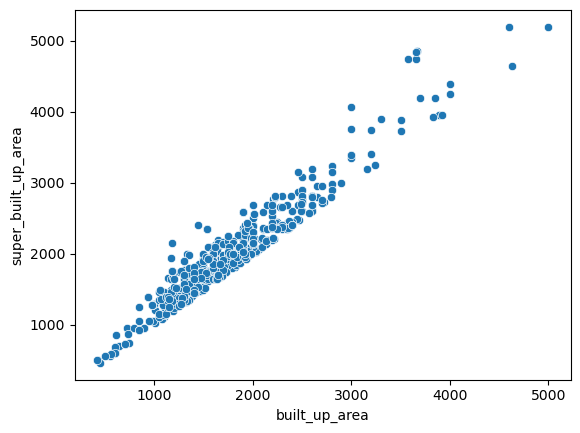

In [77]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

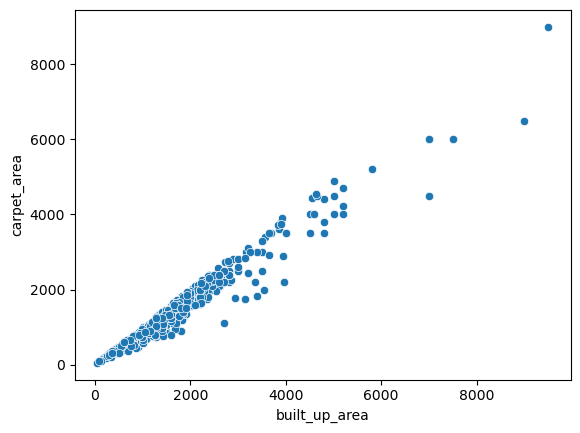

In [78]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [79]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3551    False
3552    False
3553    False
3554    False
3555    False
Length: 3556, dtype: bool

In [80]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [81]:
all_present_df.shape

(531, 24)

In [82]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [83]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [84]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [85]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [86]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
8,flat,eldeco accolade,sohna road,1.30,7424.0,1751.0,Super Built up area 1751(162.67 sq.m.)Carpet a...,3.0,3.0,3+,10.0,East,Relatively New,1751.0,NaN,1290.00,0,0,0,0,0,0,49,583.666667
22,flat,ramson kshitij sec-95 gurugram,sector 95,0.27,2700.0,1000.0,Super Built up area 1000(92.9 sq.m.)Carpet are...,2.0,2.0,0,1.0,West,Undefined,1000.0,NaN,550.00,0,0,0,0,0,0,0,500.000000
36,flat,tata primanti,sector 72,3.90,13425.0,2905.0,Super Built up area 2905(269.88 sq.m.)Carpet a...,4.0,4.0,3+,39.0,East,Relatively New,2905.0,NaN,2150.00,0,1,0,0,1,0,49,726.250000
44,flat,emaar palm gardens,sector 83,1.80,9474.0,1900.0,Super Built up area 1900(176.52 sq.m.)Carpet a...,3.0,3.0,3,6.0,South,Relatively New,1900.0,NaN,1240.04,0,1,0,0,0,2,97,633.333333
45,flat,shree vardhman flora,sector 90,0.85,4404.0,1930.0,Super Built up area 1930(179.3 sq.m.)Carpet ar...,3.0,4.0,3,3.0,South-East,Relatively New,1930.0,NaN,1450.00,0,1,1,0,0,0,110,643.333333


In [87]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\nikhi\AppData\Local\Temp\ipykernel_2024\1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\nikhi\AppData\Local\Temp\ipykernel_2024\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [88]:
df.update(sbc_df)

In [89]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1548
carpet_area            1716
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [90]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [91]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
13,flat,hsiidc sidco aravali,manesar,0.90,3648.0,2467.0,Super Built up area 2467(229.19 sq.m.),4.0,4.0,3,7.0,NaN,Moderately Old,2467.0,NaN,NaN,0,0,0,0,0,0,0,616.75
15,flat,tulip violet,sector 69,1.70,10773.0,1578.0,Super Built up area 1578(146.6 sq.m.),3.0,3.0,2,0.0,South-East,Relatively New,1578.0,NaN,NaN,0,0,0,1,0,0,49,526.00
17,flat,dlf regal gardens,sector 90,1.15,6326.0,1818.0,Super Built up area 1818(168.9 sq.m.),3.0,3.0,3+,18.0,North-West,Relatively New,1818.0,NaN,NaN,0,0,0,1,0,2,130,606.00
19,flat,m3m golfestate,sector 65,5.40,18127.0,2979.0,Super Built up area 2979(276.76 sq.m.),3.0,4.0,3,19.0,North-East,Moderately Old,2979.0,NaN,NaN,1,1,0,0,0,2,174,993.00
21,flat,bestech park view grand spa,sector 81,4.50,10714.0,4200.0,Super Built up area 4200(390.19 sq.m.),4.0,6.0,3+,17.0,NaN,Relatively New,4200.0,NaN,NaN,0,1,0,0,0,2,44,1050.00


In [92]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\nikhi\AppData\Local\Temp\ipykernel_2024\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\nikhi\AppData\Local\Temp\ipykernel_2024\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round

In [93]:
df.update(sb_df)

In [94]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1716
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [95]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [96]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,house,independent,sector 11,1.80,8079.0,2228.0,Carpet area: 2228 (206.99 sq.m.),8.0,5.0,2,1.0,South,Undefined,NaN,NaN,2228.0,0,0,0,0,0,0,0,278.500000
3,flat,signature global the millennia 3,sector 37d,0.45,7627.0,590.0,Carpet area: 590 (54.81 sq.m.),2.0,3.0,2,8.0,NaN,Undefined,NaN,NaN,590.0,0,0,0,0,0,0,8,295.000000
6,flat,essel towers,sector 14,2.20,12500.0,1760.0,Carpet area: 1760 (163.51 sq.m.),3.0,4.0,3+,3.0,North-West,Undefined,NaN,NaN,1760.0,0,0,0,0,0,0,0,586.666667
16,flat,sare homes,sector 92,0.80,4695.0,1704.0,Carpet area: 1704 (158.31 sq.m.),4.0,4.0,3,1.0,North-East,Moderately Old,NaN,NaN,1704.0,0,0,0,0,0,0,77,426.000000
24,house,raj villas,sector 52,8.00,25543.0,3132.0,Carpet area: 348 (290.97 sq.m.),6.0,5.0,3+,4.0,East,Undefined,NaN,NaN,348.0,0,0,0,0,0,0,0,522.000000


In [97]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\nikhi\AppData\Local\Temp\ipykernel_2024\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\nikhi\AppData\Local\Temp\ipykernel_2024\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet

In [98]:
df.update(c_df)

In [99]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1716
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

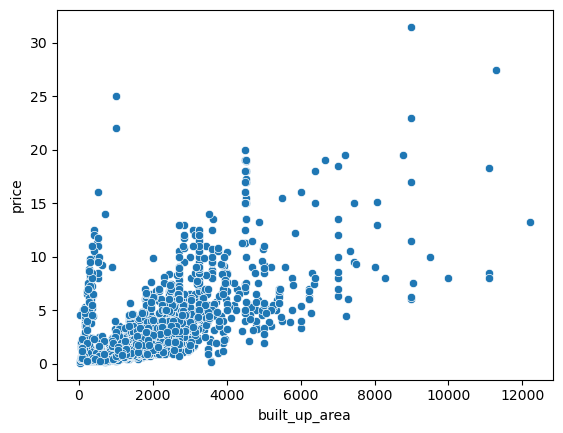

In [100]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [101]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [102]:
anamoly_df.sample(5)


,price,area,built_up_area
457,3.00,2047.0,1900.0
2900,3.55,1449.0,1449.0
1141,2.65,1400.0,1800.0
797,6.50,1836.0,215.0
2293,3.30,1242.0,1242.0


In [103]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [104]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

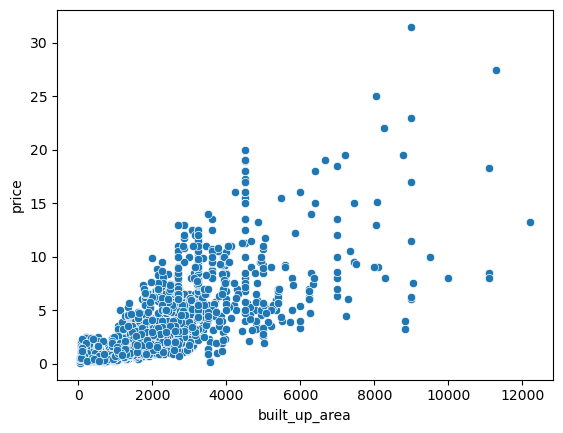

In [105]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [106]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [107]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 11,1.80,8079.0,8.0,5.0,2,1.0,South,Undefined,2476.0,0,0,0,0,0,0,0
1,house,vipul world,sector 48,3.35,5583.0,6.0,5.0,3+,3.0,South,Undefined,6000.0,0,0,0,0,0,0,53
2,flat,parsvnath exotica,sector 53,4.80,14679.0,3.0,4.0,3+,12.0,North-West,New Property,2895.0,0,0,0,0,0,0,69
3,flat,signature global the millennia 3,sector 37d,0.45,7627.0,2.0,3.0,2,8.0,NaN,Undefined,656.0,0,0,0,0,0,0,8
4,house,spaze privy,sector 72,3.10,8486.0,5.0,5.0,3+,21.0,NaN,Relatively New,3653.0,0,0,0,0,0,0,0


In [108]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

# floor num

In [109]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
270,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,0,88
588,house,independent,sector 26,4.60,12198.0,4.0,4.0,3+,NaN,NaN,Old Property,3771.0,0,0,0,0,0,0,28
635,house,independent,sector 25,13.00,45710.0,6.0,8.0,3+,NaN,NaN,Relatively New,2844.0,1,1,1,1,0,1,0
812,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,0,0
978,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0
1042,flat,NaN,sector 78,0.60,3692.0,2.0,2.0,0,NaN,NaN,Under Construction,1625.0,0,0,0,0,0,0,0
1044,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0
1561,house,ansal sushant lok,sector 43,10.50,27911.0,4.0,4.0,2,NaN,North-East,Old Property,3762.0,0,1,0,0,0,0,59
1889,house,independent,sector 7,6.50,15046.0,3.0,2.0,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,0,9
2012,house,emaar mgf marbella,sector 66,9.00,21251.0,4.0,4.0,3+,NaN,South-West,Relatively New,5200.0,0,1,1,1,0,2,114


In [110]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [111]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\nikhi\AppData\Local\Temp\ipykernel_2024\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [112]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [113]:
1011/df.shape[0]

0.28430821147356583

<Axes: ylabel='count'>

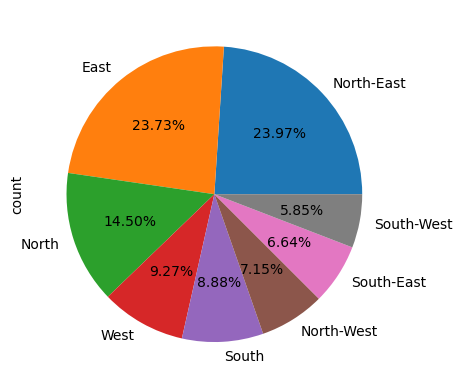

In [114]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [115]:
df.drop(columns=['facing'],inplace=True)

In [116]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1768,house,signature global city,sector 37d,1.27,8089.0,3.0,3.0,3,4.0,Undefined,1570.0,0,0,0,1,0,0,89
245,flat,shapoorji pallonji joyville gurugram,sector 102,1.28,10535.0,2.0,2.0,3,10.0,Relatively New,1100.0,0,0,0,0,0,0,49
2696,flat,smart world orchard,sector 61,2.55,15644.0,3.0,3.0,2,4.0,New Property,1630.0,0,0,0,0,1,0,30
1683,house,unitech uniworld resorts,sector 33,8.00,11429.0,4.0,4.0,3+,2.0,Old Property,7000.0,1,1,1,1,0,0,77
3444,flat,capital residences 360,sector 70a,1.68,8502.0,3.0,3.0,3+,5.0,New Property,1900.0,0,1,0,0,0,0,141


In [117]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [118]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1042,flat,NaN,sector 78,0.6,3692.0,2.0,2.0,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [119]:
df.drop(index=[1042],inplace=True)

In [120]:

df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

# age possession

In [121]:
df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           557
Moderately Old         545
Undefined              432
Old Property           293
Under Construction     123
Name: count, dtype: int64

In [122]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 11,1.80,8079.0,8.0,5.0,2,1.0,Undefined,2476.0,0,0,0,0,0,0,0
1,house,vipul world,sector 48,3.35,5583.0,6.0,5.0,3+,3.0,Undefined,6000.0,0,0,0,0,0,0,53
3,flat,signature global the millennia 3,sector 37d,0.45,7627.0,2.0,3.0,2,8.0,Undefined,656.0,0,0,0,0,0,0,8
6,flat,essel towers,sector 14,2.20,12500.0,3.0,4.0,3+,3.0,Undefined,1956.0,0,0,0,0,0,0,0
11,flat,dlf the arbour,sector 63,8.50,21519.0,4.0,4.0,0,27.0,Undefined,3950.0,0,0,0,0,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3519,flat,whiteland blissville,sector 76,1.92,11794.0,3.0,3.0,2,3.0,Undefined,1628.0,0,0,0,0,0,0,61
3523,flat,ansal height 86,sector 86,0.80,5882.0,2.0,2.0,0,1.0,Undefined,1360.0,0,0,0,0,0,0,0
3527,flat,hero homes,sector 104,1.40,15819.0,3.0,2.0,2,4.0,Undefined,1120.0,0,0,0,0,0,0,49
3534,flat,ashiana anmol,sohna road,0.90,7059.0,2.0,2.0,2,8.0,Undefined,1275.0,0,0,0,0,0,0,0


In [123]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [124]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [125]:
df['agePossession'].value_counts()

agePossession
Relatively New        1783
New Property           635
Moderately Old         586
Old Property           330
Under Construction     125
Undefined               96
Name: count, dtype: int64

In [126]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [127]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [128]:
df['agePossession'].value_counts()

agePossession
Relatively New        1801
New Property           661
Moderately Old         593
Old Property           341
Under Construction     125
Undefined               34
Name: count, dtype: int64

In [129]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [130]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [131]:
df['agePossession'].value_counts()

agePossession
Relatively New        1812
New Property           661
Moderately Old         616
Old Property           341
Under Construction     125
Name: count, dtype: int64

In [132]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [133]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [134]:
df.shape


(3555, 18)